### Desafio 3 - Tarefa - para entregar até 14/05/2020

 - Dataset `cancer` https://goo.gl/U2Uwz2
 - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

## Undersampling
- Random Undersampling
- Condensed Nearest Neighbor Rule (CNN)
- Near Miss Undersampling
- Tomek Links Undersampling
- Edited Nearest Neighbors Rule (ENN)
- One-Sided Selection (OSS)
- Neighborhood Cleaning Rule (NCR)


- __Entender em que situação cada técnica pode ser utilizada__
- __Aplicar pelo menos duas: Random Undersampling e outro__
- __Escolher dois ou mais algorítmos de classificação para serem avaliados__
- __Compará-los e escolher o de melhor Precision x Recall x F1-measure__
- `Não há um receita de bolo. Tem que testar para identificar a amostra mais adequada. Cada dataset tem sua própria característica`


- __Após escolher o melhor conjunto de dados, aplicar GridSearch ou XGBoost para otimizar o modelo acima que retornou o melhor resultado na avaliação__ 

## Oversampling
- Random Oversampling
- Synthetic Minority Oversampling Technique (SMOTE)
- Borderline-SMOTE
- Borderline Oversampling with SVM
- Adaptive Synthetic Sampling (ADASYN)


- __Entender em que situação cada técnica pode ser utilizada__
- __Aplicar pelo menos duas: Random Oversampling e outro.__
- __Escolher dois ou mais algorítmos de classificação para serem avaliados__
- __Escolher dois ou mais algorítmos de classificação para serem avaliados__
- __Compará-los e escolher o de melhor Precision x Recall x F1-measure__
- `Não há um receita de bolo. Tem que testar para identificar a amostra mais adequada. Cada dataset tem sua própria característica`


- __Após escolher o melhor conjunto de dados, aplicar GridSearch ou XGBoost para otimizar o modelo acima que retornou o melhor resultado na avaliação__ `

Automatically created module for IPython interactive environment


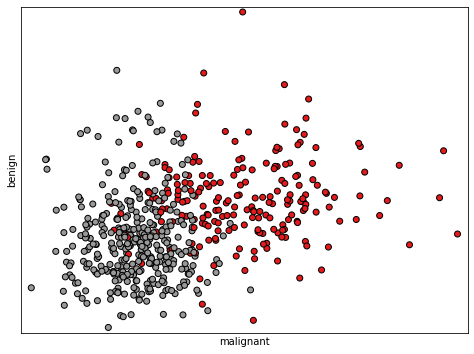

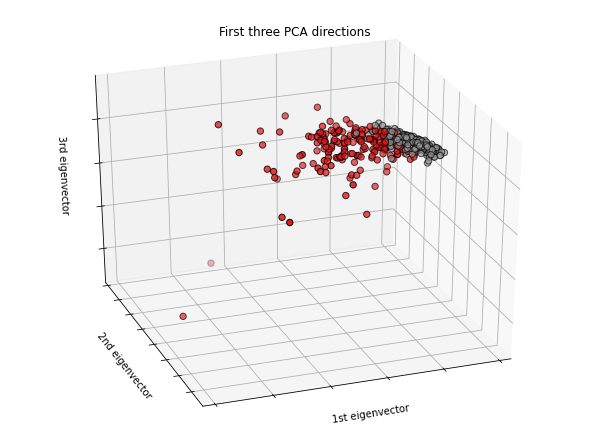

In [1]:
from sklearn.datasets import load_breast_cancer
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
cancer = load_breast_cancer() #datasets.load_cancer()
X = cancer.data[:, :2]  # we only take the first two features.
y = cancer.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('malignant')
plt.ylabel('benign')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(cancer.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [2]:
cancer.target[[10, 50, 85]]
list(cancer.target_names)

['malignant', 'benign']

 - Gráfico do dataset `cancer` adaptado de:
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
def treinao(df):
    X=df.drop("target",axis=1)
    y=df.target
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , stratify=y,random_state=42)
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('Confusion matrix:\n', conf_mat)
    print('Classification Report\n',classification_report(y_test, y_pred))

In [33]:
def juntao(df1,df2):
    df = pd.concat([df1,df2])
    treinao(df)

In [24]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [35]:
treinao(df)

Accuracy: 96.49%
Confusion matrix:
 [[38  4]
 [ 0 72]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        42
         1.0       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



1.0    357
0.0    212
Name: target, dtype: int64


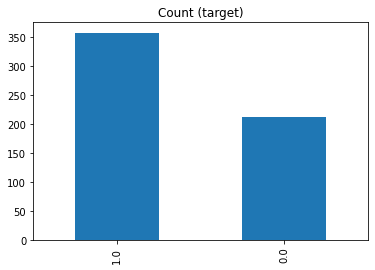

In [37]:
df.target.value_counts().plot(kind='bar', title='Count (target)')
print(df.target.value_counts())

In [38]:
# Class count
count_class_1, count_class_0 = df.target.value_counts()

# Divide by class
df_class_0 = df[df['target'] == 0.0]
df_class_1 = df[df['target'] == 1.0]

In [39]:
undersampling_random = df_class_1.sample(n=len(df_class_0))

In [40]:
juntao(undersampling_random,df_class_0)

Accuracy: 95.29%
Confusion matrix:
 [[39  4]
 [ 0 42]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        43
         1.0       0.91      1.00      0.95        42

    accuracy                           0.95        85
   macro avg       0.96      0.95      0.95        85
weighted avg       0.96      0.95      0.95        85



In [ ]:
from imblearn.over_sampling import SMOTE